In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_diabetes, load_wine

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

from sklearn.svm import SVR, SVC

import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz

## 1. 특징

+ 회귀, 분류 이상치 탐지 등에 사용되는 지도 학습 방법
+ 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
+ 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 학습
+ 각 서포트 벡터의 거리와 마진이 가장 큰 방향으로 학습
+ 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행
+ 관련 클래스
    - 회귀, 분류 : SVR, SVC
    - 선형, 비선형 : LinearSVC, LinearSVR, KernelSVC, KernelSVR

(100, 2)

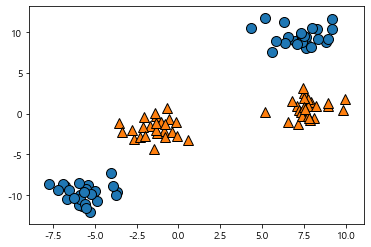

In [6]:
X, y = mglearn.datasets.make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
X.shape

In [4]:
linear_svm = LinearSVC().fit(X, y)

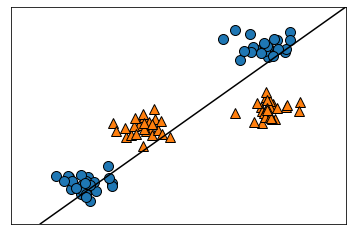

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

In [7]:
X_new = np.hstack([X, X[:, 1:]**2])
X_new

array([[-1.72161036e+00, -1.48033142e+00,  2.19138111e+00],
       [-3.65733840e+00, -9.54823830e+00,  9.11688546e+01],
       [ 7.07781630e+00,  9.95087718e-01,  9.90199567e-01],
       [-1.36579859e+00, -3.14862498e-01,  9.91383928e-02],
       [-2.66521206e+00, -3.12591651e+00,  9.77135405e+00],
       [ 7.63027116e+00,  8.69797933e+00,  7.56548444e+01],
       [-5.27144331e+00, -1.21188070e+01,  1.46865483e+02],
       [ 7.91767139e+00,  1.41547387e+00,  2.00356628e+00],
       [-1.41284184e+00,  1.12963480e-01,  1.27607478e-02],
       [-1.01519039e+00, -1.03318203e+00,  1.06746511e+00],
       [ 8.26341570e+00,  1.03472344e+01,  1.07065259e+02],
       [ 6.96767867e+00,  8.96225230e+00,  8.03219662e+01],
       [-8.47792492e-01, -2.12185612e+00,  4.50227339e+00],
       [ 7.48006237e+00,  2.49392925e+00,  6.21968311e+00],
       [ 7.71454967e+00,  1.84207010e+00,  3.39322225e+00],
       [-7.74064658e+00, -8.61800744e+00,  7.42700522e+01],
       [-5.41087235e+00, -8.71941280e+00

Text(0.5, 0, '특성 1**2')

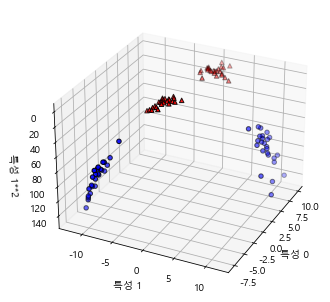

In [15]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
ax = Axes3D(figure, elev= -152, azim=-26)

mask = y == 0
mask

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", cmap=mglearn.cm2, 
           edgecolor="k", marker="^")
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")

Text(0.5, 0, '특성1 ** 2')

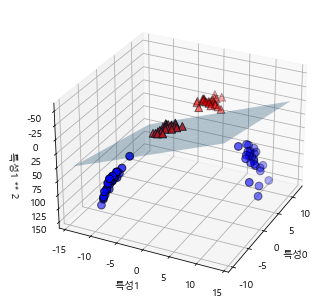

In [16]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

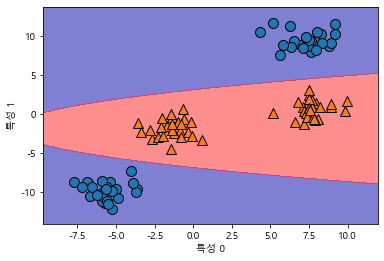

In [17]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 2. 하이퍼 파라미터

+ cost
    - decision boundary와 마진의 간격을 어느 정도로 할지 결정
    - cost가 작으면 마진은 넓어진다.


+ gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 작을 수록 영향을 끼치는 범위가 넓어진다.

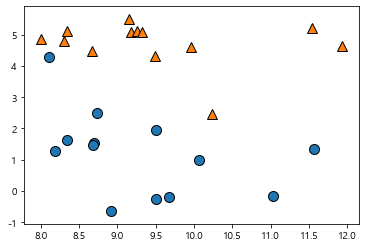

In [18]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [20]:
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

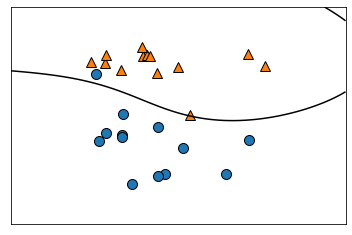

In [21]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [23]:
sv = svm.support_vectors_

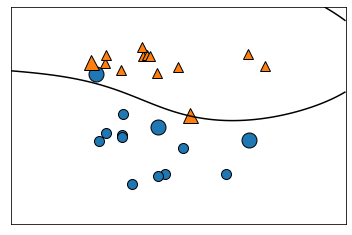

In [24]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15)

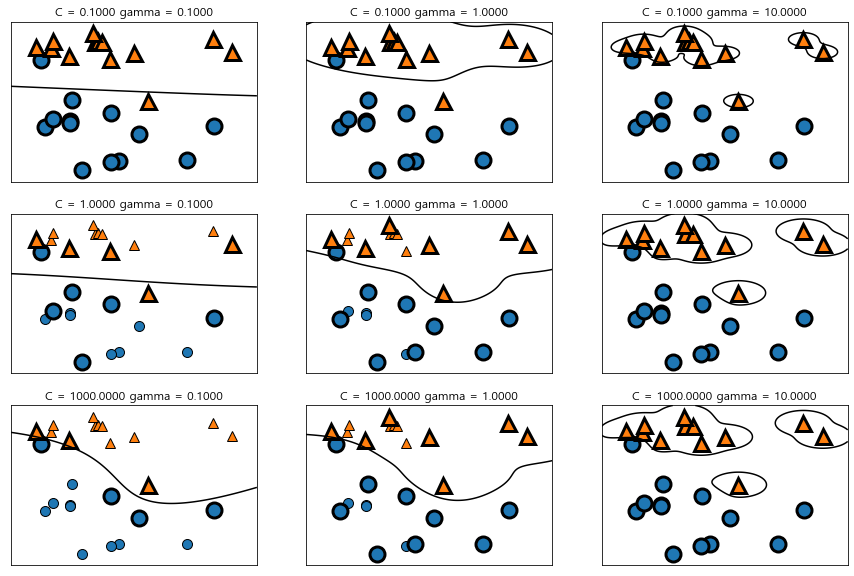

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)

## 3. SVM 클래스의 종류

### (1) 회귀 모델과 분류 모델

#### 1) 회귀 모델(SVR)

In [29]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.21772837063748762
테스트 결과 :  0.13544178468518187


#### 2) 분류 모델

In [30]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
테스트 결과 :  0.9230769230769231


### (2) 커널 기법

+ 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
+ scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function) 등 다양한 커널 기법을 지원

In [33]:
##### 회귀 모델에서 확인

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)

print("학습 결과 : ", linear_svr.score(X_train, y_train))
print("테스트 결과 : ", linear_svr.score(X_test, y_test))

print("-------------------------------------------------------------")

polynomial_svr = SVR(kernel="poly")
polynomial_svr.fit(X_train, y_train)

print("학습 결과 : ", polynomial_svr.score(X_train, y_train))
print("테스트 결과 : ", polynomial_svr.score(X_test, y_test))

print("-------------------------------------------------------------")

rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("학습 결과 : ", rbf_svr.score(X_train, y_train))
print("테스트 결과 : ", rbf_svr.score(X_test, y_test))

학습 결과 :  0.7155066205123104
테스트 결과 :  0.6380398541381507
-------------------------------------------------------------
학습 결과 :  0.2024454261446289
테스트 결과 :  0.133668450367462
-------------------------------------------------------------
학습 결과 :  0.21772837063748762
테스트 결과 :  0.13544178468518187


In [34]:
##### 분류 모델에서 확인

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train, y_train)

print("학습 결과 : ", linear_svc.score(X_train, y_train))
print("테스트 결과 : ", linear_svc.score(X_test, y_test))

print("-------------------------------------------------------------")

polynomial_svc = SVC(kernel="poly")
polynomial_svc.fit(X_train, y_train)

print("학습 결과 : ", polynomial_svc.score(X_train, y_train))
print("테스트 결과 : ", polynomial_svc.score(X_test, y_test))

print("-------------------------------------------------------------")

rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("학습 결과 : ", rbf_svc.score(X_train, y_train))
print("테스트 결과 : ", rbf_svc.score(X_test, y_test))

학습 결과 :  0.960093896713615
테스트 결과 :  0.986013986013986
-------------------------------------------------------------
학습 결과 :  0.9014084507042254
테스트 결과 :  0.9230769230769231
-------------------------------------------------------------
학습 결과 :  0.9014084507042254
테스트 결과 :  0.9230769230769231


### (3) 매개변수 튜닝

+ SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
+ 매개변수를 변경하면서 성능 변화를 관찰

In [45]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [46]:
##### polynomial 기법 사용

polynomial_svc = SVC(kernel="poly", C=0.1, gamma="auto")
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, C={}, gamma={}".format(0.1, "auto"))
print("polynimial 학습 결과 : ", polynomial_svc.score(X_train, y_train))
print("polynimial 테스트 결과 : ", polynomial_svc.score(X_test, y_test))

kernel=poly, C=0.1, gamma=auto
polynimial 학습 결과 :  0.971830985915493
polynimial 테스트 결과 :  0.986013986013986


In [55]:
##### rbf 기법 사용

rbf_svc = SVC(kernel="rbf", C=10, gamma="scale")
rbf_svc.fit(X_train, y_train)

print("kernel=rbf, C={}, gamma={}".format(10, "scale"))
print("rbf 학습 결과 : ", rbf_svc.score(X_train, y_train))
print("rbf 테스트 결과 : ", rbf_svc.score(X_test, y_test))

kernel=rbf, C=0.1, gamma=auto
rbf 학습 결과 :  0.92018779342723
rbf 테스트 결과 :  0.9300699300699301


### (4) 데이터 전처리

+ SVM은 입력 데이터가 정규화되어야 좋은 성능을 보인다.
+ 주로 모든 특성값을 0, 1 범위로 맞추는 방법을 사용한다.
+ sklearn의 StandardScaler 또는 MinMaxScaler 사용

In [56]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [57]:
model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
테스트 결과 :  0.9230769230769231


In [60]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [61]:
model = SVC()
model.fit(X_train_std, y_train)

print("학습 결과 : ", model.score(X_train_std, y_train))
print("테스트 결과 : ", model.score(X_test_std, y_test))

학습 결과 :  0.9835680751173709
테스트 결과 :  0.986013986013986


In [62]:
scaler = MinMaxScaler()
X_train_mms = scaler.fit_transform(X_train)
X_test_mms = scaler.transform(X_test)

In [63]:
model = SVC()
model.fit(X_train_mms, y_train)

print("학습 결과 : ", model.score(X_train_mms, y_train))
print("테스트 결과 : ", model.score(X_test_mms, y_test))

학습 결과 :  0.9812206572769953
테스트 결과 :  0.986013986013986


In [64]:
min = X_train.min(axis=0)
range = (X_train - min).max(axis = 0)

X_train_cus = (X_train - min) / range
X_test_cus = (X_test - min) / range

In [65]:
model = SVC()
model.fit(X_train_cus, y_train)

print("학습 결과 : ", model.score(X_train_cus, y_train))
print("테스트 결과 : ", model.score(X_test_cus, y_test))

학습 결과 :  0.9812206572769953
테스트 결과 :  0.986013986013986


### (5) LinearSVR

#### 1) Boston Housing Sample

In [89]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [90]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

SVR(kernel='linear')

In [92]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.7245983513691964
테스트 결과 :  0.6147612862092583


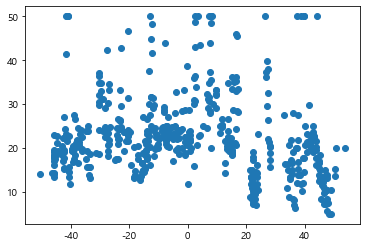

In [54]:
from sklearn.manifold import TSNE
##### 차원 축소

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

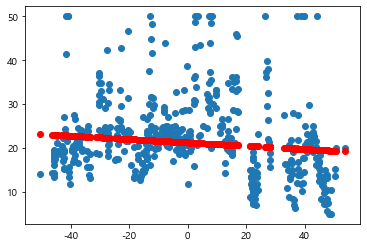

In [55]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [63]:
from sklearn.pipeline import make_pipeline
import multiprocessing

estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00997353, 0.00997329, 0.00997353, 0.00897598, 0.00997353]),
 'score_time': array([0.0009973 , 0.00099969, 0.0009973 , 0.00199699, 0.00199699]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [66]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [71]:
print(gs.best_params_)
print(gs.best_estimator_)
print(gs.best_score_)

{'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
0.49854468515516936


In [72]:
model = SVR(kernel="linear", C=0.1, gamma="scale", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.6896771426943518
테스트 결과 :  0.7313920626877581


#### 2) Diabetes Sample

In [79]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.4924588716811171
테스트 결과 :  0.5570136940699909


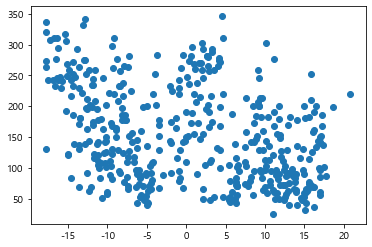

In [82]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

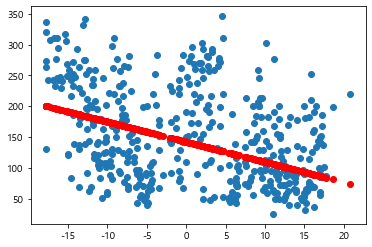

In [83]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [84]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.7s finished


{'fit_time': array([0.00691676, 0.00592279, 0.00496173, 0.004987  , 0.00598454]),
 'score_time': array([0.0009973 , 0.00099397, 0.00099707, 0.00099754, 0.00199533]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [85]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [86]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
0.478076999215815


In [87]:
model = SVR(kernel="linear", C=1.0, gamma="scale", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.49306502223681103
테스트 결과 :  0.5563982990905709


### (6) KernelSVR

#### 1) Boston Housing Sample

학습 결과 :  0.6804558691341752
테스트 결과 :  0.5895829313193317


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


cross validate 평균 :  0.17631266230186618
Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'model__kernel': 'rbf'}
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적의 파라미터 :  {'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}
학습 결과 :  0.6807135712191222
테스트 결과 :  0.5902108703816756


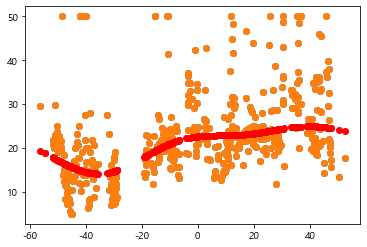

In [99]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="rbf")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))


##### 차원 축소
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
cv = cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)
print("cross validate 평균 : ", cv["test_score"].mean())


pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [{"model__kernel":["rbf", "polynomial", "sigmoid"]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print(gs.best_params_)
print(gs.best_estimator_)


pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print("최적의 파라미터 : ", gs.best_params_)



model = SVR(kernel="rbf", C=1.0, gamma="scale", epsilon=0.01)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

#### 2) Diabetes Sample

학습 결과 :  0.15345164466149952
테스트 결과 :  0.18096718824416858


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'model__kernel': 'sigmoid'}
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])
Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}
0.3500140931673538
학습 결과 :  0.3726520070304975
테스트 결과 :  0.3905617056363221


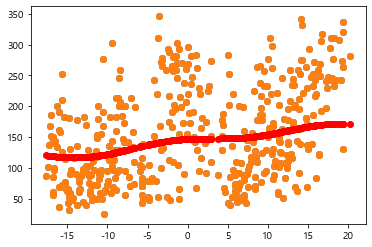

In [108]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="rbf")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)



pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [{"model__kernel":["rbf", "polynomial", "sigmoid"]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print(gs.best_params_)
print(gs.best_estimator_)



pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="sigmoid"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print(gs.best_params_)
print(gs.best_score_)


model = SVR(kernel="sigmoid", C=1.0, gamma="auto", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

### (7) LinearSVC

#### 1) breast cancer sample

In [112]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))




estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)



pipe = Pipeline([("scaler", StandardScaler()), ("model", SVC(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

print(gs.best_params_)
print(gs.best_score_)


model = SVC(kernel="linear", C=0.1, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9906103286384976
테스트 결과 :  0.986013986013986
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 0.1, 'model__gamma': 'scale'}
0.9736531594472908
학습 결과 :  0.9788732394366197
테스트 결과 :  0.993006993006993


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


#### 2) 붓꽃 데이터

#### 3) Wine Sample

### (8) KernelSVC

#### 1) breast cancer sample

#### 2) iris sample

#### 3) wine sample